In [12]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [13]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [14]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [15]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [16]:
# 심층 신경망 만들기

In [17]:
model = keras.Sequential([dense1, dense2])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
#층을 추가하는 다른 방법

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='fashionModel')

In [24]:
model.summary()

Model: "fashionModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3344 - accuracy: 0.8782


## 렐루 활성화 함수

In [26]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [49]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5)
history2 = model.fit(val_scaled, val_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2938 - accuracy: 0.8921
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2848 - accuracy: 0.8956
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2767 - accuracy: 0.8989
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2693 - accuracy: 0.9020
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2629 - accuracy: 0.9049
Epoch 1/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3569 - accuracy: 0.8808
Epoch 2/5
375/375 [==============================] - 0s 1ms/step - loss: 0.3290 - accuracy: 0.8842
Epoch 3/5
375/375 [==============================] - 1s 1ms/step - loss: 0.3084 - accuracy: 0.8928
Epoch 4/5
375/375 [==============================] - 0s 1ms/step - loss: 0.2921 - accuracy: 0.8988
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.2789 - accuracy: 0.9029


In [30]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 929us/step - loss: 0.3797 - accuracy: 0.8702


[0.37970125675201416, 0.8702499866485596]

In [38]:
history.history

{'loss': [0.3044080436229706,
  0.29404452443122864,
  0.28635358810424805,
  0.2793505787849426,
  0.26965442299842834],
 'accuracy': [0.890916645526886,
  0.8949999809265137,
  0.8972916603088379,
  0.9021250009536743,
  0.9041875004768372]}

In [50]:
history2.history

{'loss': [0.35686901211738586,
  0.32898765802383423,
  0.30844515562057495,
  0.2920687198638916,
  0.2788880169391632],
 'accuracy': [0.8808333277702332,
  0.8842499852180481,
  0.8927500247955322,
  0.8987500071525574,
  0.902916669845581]}

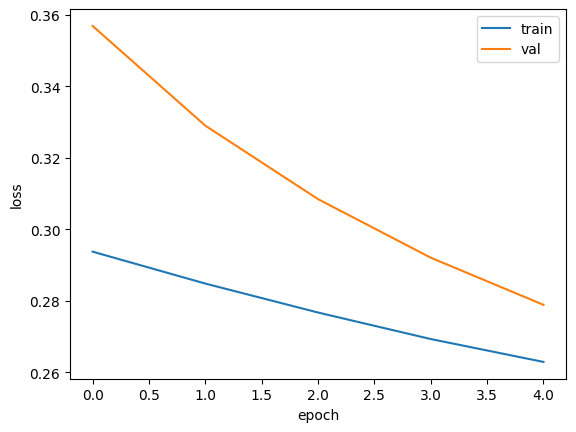

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label="train")
plt.plot(history2.history['loss'], label="val")
plt.xlabel('epoch')
plt.ylabel('loss')
# plt.xlim(0, 50)
plt.legend(['train', 'val'])
plt.show()

옵티마이저

In [40]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [43]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [44]:

adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.5262 - accuracy: 0.8154
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3940 - accuracy: 0.8589
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3546 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3284 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3058 - accuracy: 0.8872


In [48]:

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3509 - accuracy: 0.8751


[0.3508651852607727, 0.875083327293396]